# LGMVIP Data Science Internship

# Intermediate Level Task 2 :Prediction Using Decision Tree Algorithm

# Partcipant Name: Dienga John Divine

# Tecchnique:Decision Tree

In [2]:
'''DATA ANALYSIS'''
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
# Reading data
iris_data_set = pd.read_csv('Iris.csv')
iris_data_set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
del iris_data_set['Id']
iris_data_set

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


(<AxesSubplot:xlabel='Species'>, <AxesSubplot:ylabel='Density'>)

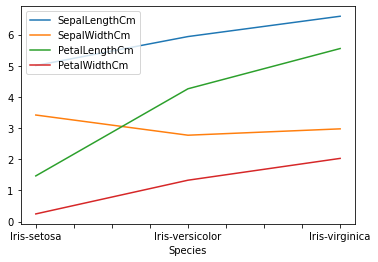

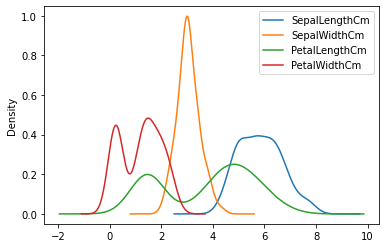

In [9]:
group=iris_data_set.groupby('Species')
group.mean().plot(),iris_data_set.plot.density()


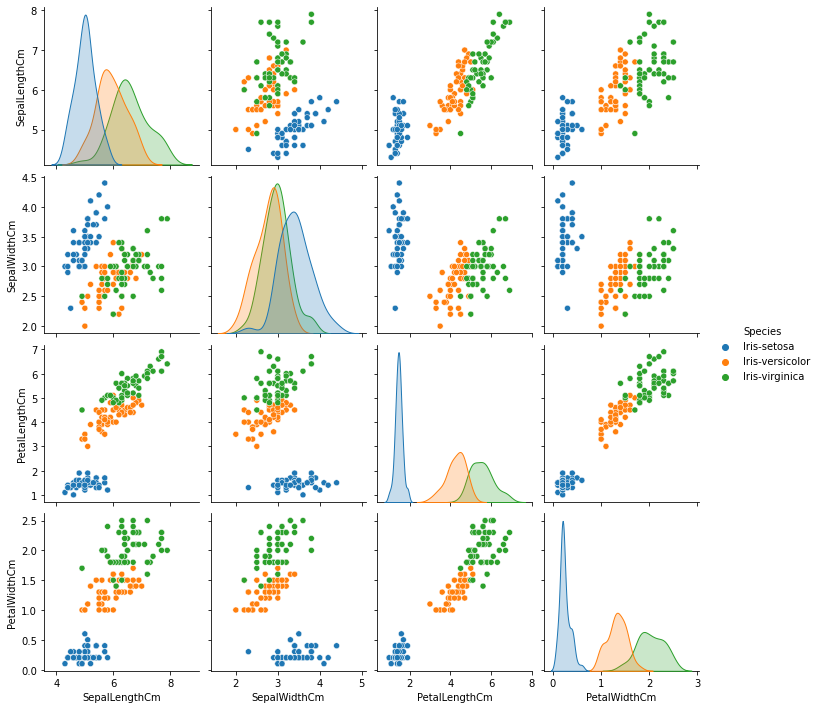

In [12]:
sb.pairplot(data=iris_data_set,hue='Species')

(<AxesSubplot:>,
        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 count     150.000000    150.000000     150.000000    150.000000
 mean        5.843333      3.054000       3.758667      1.198667
 std         0.828066      0.433594       1.764420      0.763161
 min         4.300000      2.000000       1.000000      0.100000
 25%         5.100000      2.800000       1.600000      0.300000
 50%         5.800000      3.000000       4.350000      1.300000
 75%         6.400000      3.300000       5.100000      1.800000
 max         7.900000      4.400000       6.900000      2.500000)

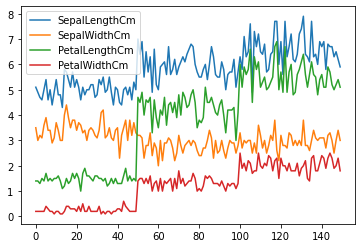

In [14]:
iris_data = iris_data_set[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
iris_target = iris_data_set[['Species']]
iris_data.plot(),iris_data_set.describe()

In [18]:
sl=iris_data_set.iloc[:,0]
sw=iris_data_set.iloc[:,1]
pl=iris_data_set.iloc[:,2]
pw=iris_data_set.iloc[:,3]
sl,sw,pl,pw
sa=[]
pa=[]
for i in range(0,150):
    sa.append(sl[i]*sw[i])
    pa.append(pl[i]*pw[i])
    
sa,pa
sepalArea=pd.DataFrame()
iris_area=pd.DataFrame()
iris_area['SepalAreaCm2']=sa
iris_area['PetalAreaCm2']=pa
iris_area['Species']=iris_target
iris_area

,SepalAreaCm2,PetalAreaCm2,Species
0,17.85,0.28,Iris-setosa
1,14.70,0.28,Iris-setosa
2,15.04,0.26,Iris-setosa
3,14.26,0.30,Iris-setosa
4,18.00,0.28,Iris-setosa
...,...,...,...
145,20.10,11.96,Iris-virginica
146,15.75,9.50,Iris-virginica
147,19.50,10.40,Iris-virginica
148,21.08,12.42,Iris-virginica


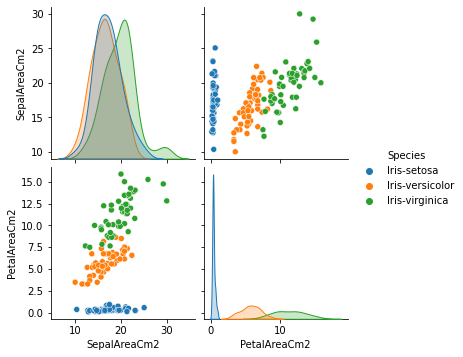

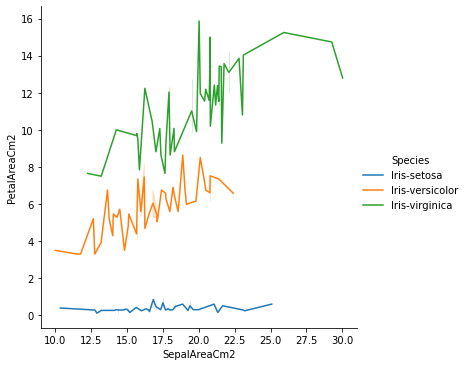

In [19]:
sb.pairplot(data=iris_area,hue='Species')
sb.relplot(data=iris_area,x='SepalAreaCm2',y='PetalAreaCm2',hue='Species',kind='line')

In [20]:
iris_area.describe()

,SepalAreaCm2,PetalAreaCm2
count,150.000000,150.000000
mean,17.806533,5.793133
std,3.368693,4.713499
min,10.000000,0.110000
25%,15.645000,0.420000
50%,17.660000,5.615000
75%,20.325000,9.690000
max,30.020000,15.870000


In [21]:
#Model building
from  sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics

iris_train,iris_test,target_train,target_test =train_test_split(iris_data,iris_target,test_size=0.2,random_state=1)

Dtree_classify = DecisionTreeClassifier(class_weight='balanced')
Dtree_classified = Dtree_classify.fit(iris_train,target_train)

In [22]:
iris_predict = Dtree_classified.predict(iris_test)
metrics.accuracy_score(target_test,iris_predict)

0.9666666666666667

In [23]:
iris_predict

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
'''Model deployment'''
import  joblib
joblib.dump(Dtree_classified,'iris-Dtree-classifier.joblib')
Dtree_classified=joblib.load('iris-Dtree-classifier.joblib')

In [25]:
sample2=[[10,10,1,2],[2,6,6,5]]
Dtree_classified.predict(sample2)

array(['Iris-setosa', 'Iris-virginica'], dtype=object)

In [26]:
#visualizing the decision tree
import graphviz
from sklearn.tree import export_graphviz

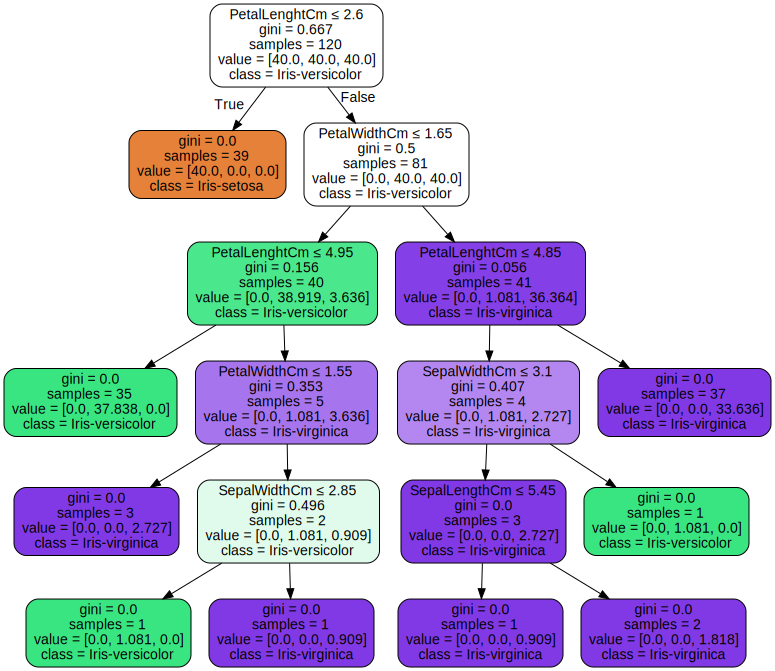

In [27]:
data = export_graphviz(Dtree_classified,out_file=None,feature_names=['SepalLengthCm','SepalWidthCm','PetalLenghtCm','PetalWidthCm'],class_names=['Iris-setosa','Iris-versicolor', 'Iris-virginica'],filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(data)
graph

In [28]:
#Output the pdf file for the graph
graph.render('Decision Tree graph for Iris')

'Decision Tree graph for Iris.pdf'

# The End